In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt

from matplotlib import style
from matplotlib.widgets import Cursor, Button
import pandas as pd
import mplcursors
#%matplotlib inline
style.use('ggplot')
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


In [2]:
xl = pd.ExcelFile("E:\\THESIS\\ADNI_data\\ADNI1_Annual_2_Yr_3T_306_WORK\\ClassifierResults\\all_GLCM_results.xlsx")

xl = pd.ExcelFile(r"E:\THESIS\ADNI_data\ADNI1_Annual_2_Yr_3T_306_WORK\FiftyFour\excels\all__glcm54.xlsx")


dataX = [1,2,3,4,5,6,7]

sheets = ['dtree','gauss','knbr','logreg','lda','rforest','svc']


In [3]:
classifiers = []

for i in range(7):
    classifiers.append(pd.read_excel(xl,sheets[i]))


In [8]:
accuracies = []

for i in range(len(classifiers)):
    accuracies.append(list(classifiers[i]['%-ACCURACY']))


In [10]:
n = int(input('Enter component no. >> '))
xd = list(range(1,8))

yd = []

for i in range(7):
    yd.append(accuracies[i][n-1])


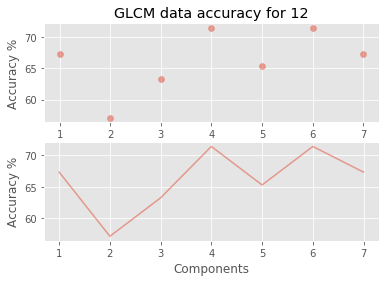

In [11]:
fig, ax = plt.subplots(2)
ax[0].set_title('GLCM data accuracy for {}'.format(n))
ax[0].set_xlabel('Components')
ax[0].set_ylabel('Accuracy %')
ax[1].set_xlabel('Components')
ax[1].set_ylabel('Accuracy %')


ax[0].scatter(xd, yd, alpha=0.5)
ax[1].plot(xd, yd, alpha=0.5)

mplcursors.cursor(hover=True)
plt.show()

In [18]:
def visualize(n):
    xl = pd.ExcelFile("E:\\THESIS\\ADNI_data\\ADNI1_Annual_2_Yr_3T_306_WORK\\ClassifierResults\\all_GLCM_results.xlsx")

    xl = pd.ExcelFile(r"E:\THESIS\ADNI_data\ADNI1_Annual_2_Yr_3T_306_WORK\FiftyFour\excels\all__glcm54.xlsx")

    dataX = [1,2,3,4,5,6,7]

    sheets = ['dtree','gauss','knbr','logreg','lda','rforest','svc']

    classifiers = []

    for i in range(7):
        classifiers.append(pd.read_excel(xl,sheets[i]))

    accuracies = []

    for i in range(len(classifiers)):
        accuracies.append(list(classifiers[i]['%-ACCURACY']))

    xd = list(range(1,8))

    yd = []

    for i in range(7):
        yd.append(accuracies[i][n-1])

    fig, ax = plt.subplots(2)
    
    ax[0].set_title('classifier performance on GLCM data')
    ax[0].set_xlabel('Components')
    ax[0].set_ylabel('Accuracy %')
    
    ax[1].set_xlabel('Components')
    ax[1].set_ylabel('Accuracy %')
    plt.xticks(xd,['D-Tree','G-NB','KNbr','LogReg','LDA','RandForest','SVC'])
    plt.xticks(rotation=45,ha='right')

    ax[0].scatter(xd, yd, alpha=0.5,s=7)
    ax[1].plot(xd, yd, alpha=0.5)

    mplcursors.cursor(hover=True)
    plt.show()

    print('For component #%d >>'%n)
    print('1. Decision-tree classifier - {0:.2f}%'.format(yd[0]))
    print('2. Gaussian NB classifier - {0:.2f}%'.format(yd[1]))
    print('3. KNeighbor classifier - {0:.2f}%'.format(yd[2]))
    print('4. Logistic regression classifier - {0:.2f}%'.format(yd[3]))
    print('5. LDA classifier - {0:.2f}%'.format(yd[4]))
    print('6. Random forest classifier - {0:.2f}%'.format(yd[5]))
    print('7. SVM classifier - {0:.2f}%'.format(yd[6]))

lim = 160 #300
interact(visualize,n=(1,lim))

interactive(children=(IntSlider(value=80, description='n', max=160, min=1), Output()), _dom_classes=('widget-i…

<function __main__.visualize(n)>